<p style="text-align: center; font-size: 32px; font-weight: bold;">Top S&P 500 Gainers and Losers Over the Last 14 Days</p>

- This script analyzes S&P 500 data to identify the top 10 distinct gaining and losing companies over the most recent 14-day period.

- It reads the merged dataset, cleans the percentage change values, converts dates, and filters the data accordingly.

In [1]:
import pandas as pd

# Load data
gainers_losers = pd.read_csv('output/s&p500_merged.csv', sep=';')

# Rename '% Chg' to 'Percent Change'
gainers_losers.rename(columns={'% Chg': 'Percent Change'}, inplace=True)

# Clean and convert
gainers_losers['Percent Change'] = gainers_losers['Percent Change'].str.replace('[()%]', '', regex=True).astype(float)
gainers_losers['Date'] = pd.to_datetime(gainers_losers['Date'])

# Get the last 14 days
last_14_days = gainers_losers[gainers_losers['Date'] >= (gainers_losers['Date'].max() - pd.Timedelta(days=14))]

# Sort the entire dataset for top gainers (descending order of Percent Change) and get distinct companies
top_gainers_14_sorted = (
    last_14_days.sort_values(by='Percent Change', ascending=False)
    .drop_duplicates(subset='Company', keep='first')
    .head(10)
)

# Sort the entire dataset for top losers (ascending order of Percent Change) and get distinct companies
top_losers_14_sorted = (
    last_14_days.sort_values(by='Percent Change', ascending=True)
    .drop_duplicates(subset='Company', keep='first')
    .head(10)
)

# # Display results
# print("Top 10 Distinct Gainers in the Last 14 Days")
# print(top_gainers_14_sorted[['Company', 'Percent Change', 'Date']])

# print("\nTop 10 Distinct Losers in the Last 14 Days")
# print(top_losers_14_sorted[['Company', 'Percent Change', 'Date']])



- This script uses Seaborn and Matplotlib to create side-by-side bar plots showcasing the top 10 gaining and losing S&P 500 companies over the past 14 days. 

- The green bars highlight the gainers, while the red bars represent the losers. 


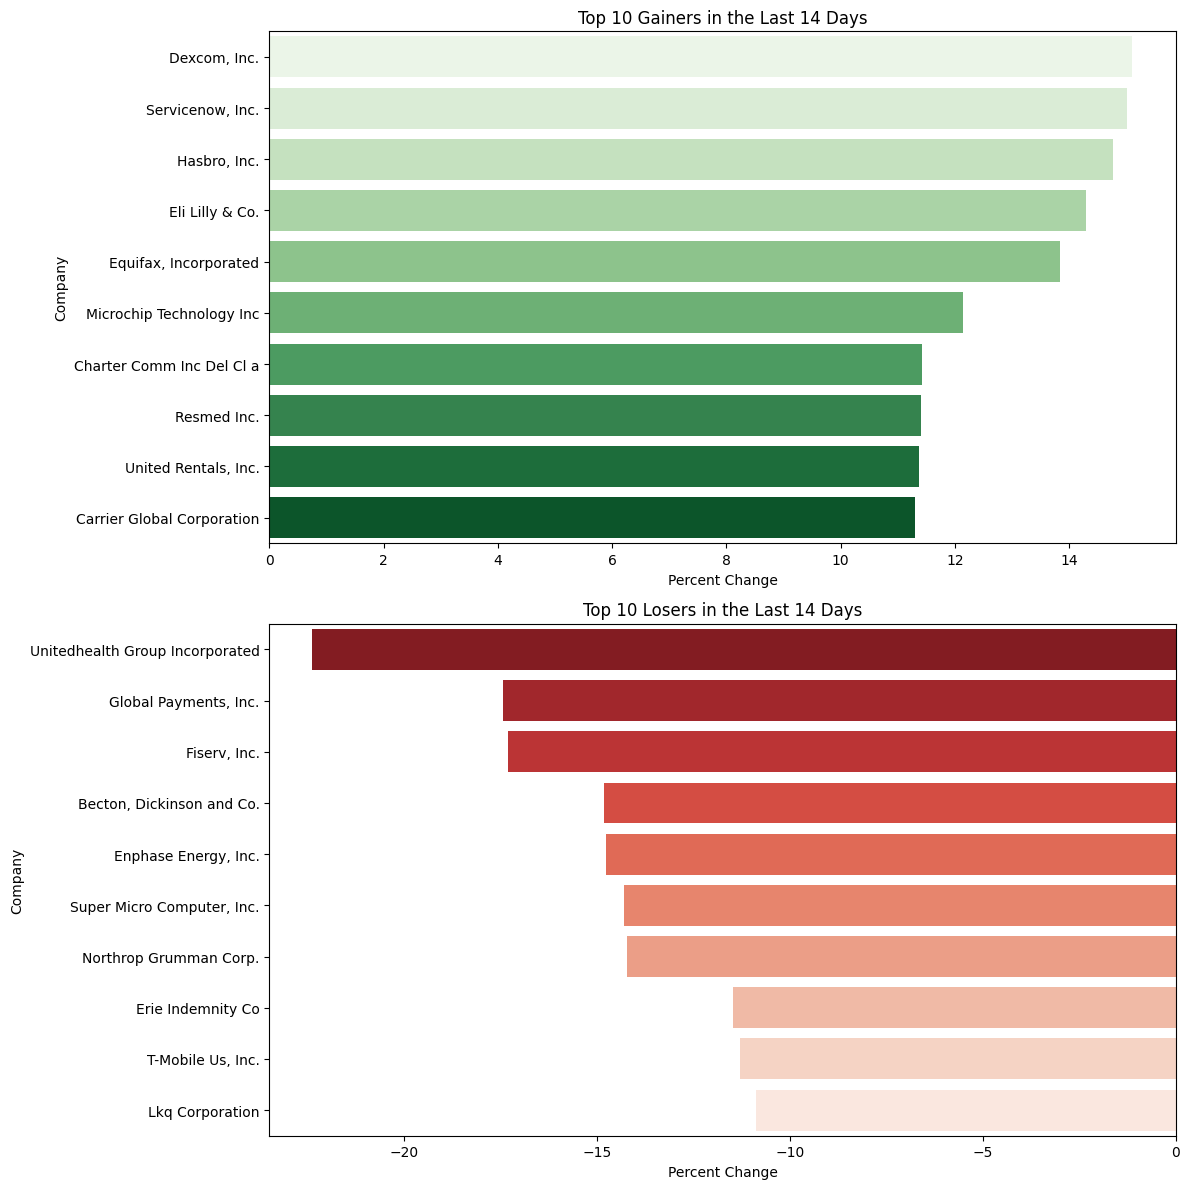

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure
fig, axes = plt.subplots(2, 1, figsize=(12, 12))

# Plot top 10 gainers over the last 14 days
sns.barplot(
    data=top_gainers_14_sorted,
    x='Percent Change',
    y='Company',
    hue='Company',
    palette="Greens",
    legend=False,
    ax=axes[0],
    edgecolor='none'  # Remove the black edges
)
axes[0].set_title(f"Top 10 Gainers in the Last 14 Days")

# Plot top 10 losers over the last 14 days
sns.barplot(
    data=top_losers_14_sorted,
    x='Percent Change',
    y='Company',
    hue='Company',
    palette='Reds_r',
    legend=False,
    ax=axes[1],
    edgecolor='none'  # Remove the black edges
)
axes[1].set_title(f"Top 10 Losers in the Last 14 Days")

plt.tight_layout()
plt.show()